In [9]:
import sys

print(sys.path) #print working directory

['/home/xiaoming/Research/72hr plates_TA,TC_4-3-23_4-7-23', '/home/xiaoming/.conda/envs/wanxiang/lib/python311.zip', '/home/xiaoming/.conda/envs/wanxiang/lib/python3.11', '/home/xiaoming/.conda/envs/wanxiang/lib/python3.11/lib-dynload', '', '/home/xiaoming/.conda/envs/wanxiang/lib/python3.11/site-packages']


In [10]:
# please install the package we used here
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray
import time

#import seaborn as sns
#from sklearn.model_selection import train_test_split
# if you have Inter cpu in your machine, 
# please install Intel(R) Extension for Scikit-learn (https://github.com/intel/scikit-learn-intelex)


In [11]:
start_time = time.time() #test the running time

target = []
flat_data = []
images = []


DataDirectory = '/home/xiaoming/Research/72hr plates_TA,TC_4-3-23_4-7-23'

# Images to be classified as:
Categories = ["1%","1.5%","2%"]

for i in Categories:
    print("Category is:",i,"\tLabel encoded as:",Categories.index(i))
  # Encode categories cute puppy as 0, icecream cone as 1 and red rose as 2
    target_class = Categories.index(i)
  # Create data path for all folders under MinorProject
    path = os.path.join(DataDirectory,i)
  # Image resizing, to ensure all images
    
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img))
    # Skimage normalizes the value of image
        img_resized = resize(img_array,(920,1228,3)) #use original size
        flat_data.append(img_resized.flatten())
        images.append(img_resized)
        target.append(target_class)
# Convert list to numpy array format
flat_data = np.array(flat_data)
images = np.array(images)
target = np.array(target)



end_time = time.time() #test the running time
running_time = end_time-start_time
print("\n running time: ",running_time,"s")

Category is: 1% 	Label encoded as: 0
Category is: 1.5% 	Label encoded as: 1
Category is: 2% 	Label encoded as: 2

 running time:  34.89029049873352 s


In [12]:
#check the data type
img_array1 = img_array[3,3]
img_resize1 = img_resized[3,3]

print(img_array1.dtype, img_resize1.dtype)

uint8 float64


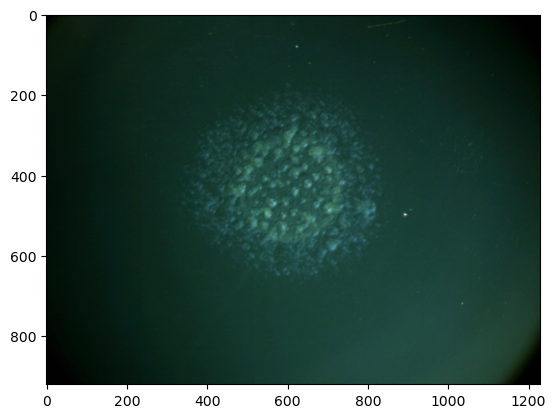

In [13]:
plt.imshow(images[76])

In [14]:
df = pd.DataFrame(flat_data)
# Create a column for output data called Target
df['Target'] = target
print(type(df.at[1,1]))
# Rows are all the input images (90 images, 30 of each category)
df

<class 'numpy.float64'>


,0,1,2,3,4,5,6,7,8,9,...,3389271,3389272,3389273,3389274,3389275,3389276,3389277,3389278,3389279,Target
0,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0
1,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0
2,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0
3,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0
4,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,2
176,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,2
177,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,2
178,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,2


In [7]:
%%time
#skip this for saving time, if you don't need the raw data
df.to_csv('all_potts.csv') 
print("saved")


KeyboardInterrupt



## Training

In [15]:
start_time = time.time() #test the running time


from sklearnex import patch_sklearn #conda install -c intel scikit-learn-intelex
patch_sklearn() # this opitimzation can only apply on float and double, only available on Intel CPU
# Split data into input and output sets introduction： https://github.com/intel/scikit-learn-intelex）
from sklearn.model_selection import train_test_split

# x is all input values of images and their pixel values (90 images * 67500)
# y is output values or correct label of image (90 images * 1 column of labels)

x = df.iloc[:,:-1].values
y = target
print("Input data dimensions:",x.shape)
print("Output data dimensions:",y.shape)

# Stratify ensures every image is divided in equal proportions (no bias)
x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=True,test_size = 0.7,random_state=109,stratify=y) #set test size HERE
# (the test size we set is 60% and 70%)
print("Dimensions of input training data:",x_train.shape)
print("Dimensions of input testing data:",x_test.shape)
print("Dimensions of output training data:",y_train.shape)
print("Dimensions of output testing data:",y_test.shape)

end_time = time.time() #test the running time
running_time = end_time-start_time
print("\n running time: ", running_time,"s")

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Input data dimensions: (180, 3389280)
Output data dimensions: (180,)
Dimensions of input training data: (54, 3389280)
Dimensions of input testing data: (126, 3389280)
Dimensions of output training data: (54,)
Dimensions of output testing data: (126,)

 running time:  1.7020456790924072 s


In [17]:
# Check if testing and training data are divided in equal proportions
print("Labels\t\t   Image index considered")
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

Labels		   Image index considered
(array([0, 1, 2]), array([18, 18, 18]))
(array([0, 1, 2]), array([42, 42, 42]))


In [18]:
import os
start_time = time.time() #test the running time
from sklearnex import patch_sklearn
patch_sklearn()

#from sklearnex import unpatch_sklearn  #for unsupported cpu
#unpatch_sklearn()

import multiprocessing
from joblib import parallel_backend
# Applying Support Vector Machine classifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]
                    
# Apply GridSearchCV to find best parameters for given dataset
# verbose is used to describe the steps taken to find best parameters

num_jobs = int(multiprocessing.cpu_count())  #parallel computing
cv = GridSearchCV(SVC(),tuned_parameters,refit=True,cv=5,verbose=3) 
print("number of core: ",num_jobs)
print("running>>>")

cv.fit(x_train,y_train)

end_time = time.time() #test the running time
running_time = end_time-start_time
print("\n running time: ", running_time,"s")

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


number of core:  24
running>>>
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.273 total time=   2.1s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.364 total time=   2.0s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.455 total time=   2.0s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.364 total time=   2.0s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.500 total time=   2.2s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.909 total time=   2.1s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.818 total time=   2.1s
[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=1.000 total time=   2.3s
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=1.000 total time=   2.1s
[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.900 total time=   2.5s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.273 total time=   2.4s
[CV 2/5] END .....

In [23]:
# Display parameters selected by GridSearchCV for SVM 3 classes
# Parameters obtained: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
print("Best parameters to apply are:",cv.best_params_)
# Display model after hyperparameter tuning
svm = cv.best_estimator_
print("Model after tuning is:\n",svm)

Best parameters to apply are: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
Model after tuning is:
 SVC(C=10, gamma=0.0001)


In [24]:
# Predict the output of model after above parameters are applied to it
y_prediction = svm.predict(x_test)

In [25]:
# Print expected and predicted output
print("Expected results: ",y_test)
print("Predicted results:",y_prediction)

Expected results:  [2 2 0 0 2 0 1 0 1 1 1 2 0 2 1 1 2 1 2 2 2 1 0 2 2 1 1 1 1 0 2 0 1 1 0 2 2
 1 2 1 1 2 0 2 1 0 2 1 2 1 2 1 0 2 2 1 0 2 0 1 0 0 0 0 2 2 0 1 0 1 1 0 0 2
 0 1 1 2 2 0 0 2 1 2 2 0 2 0 2 0 0 1 1 1 1 1 1 0 0 2 1 1 2 0 2 2 2 1 2 1 0
 0 0 0 0 2 0 0 1 2 0 0 1 1 2 0]
Predicted results: [2 2 0 0 2 0 1 0 1 0 1 2 0 2 1 1 2 1 2 2 2 1 0 2 2 1 1 1 1 0 2 0 1 1 0 2 2
 1 2 1 1 2 0 2 1 0 2 1 2 1 2 1 0 2 2 1 0 2 0 1 0 2 1 0 2 2 0 1 0 1 1 0 0 2
 0 1 0 2 2 0 0 2 1 2 2 0 2 0 2 0 0 1 1 1 0 1 1 2 0 2 1 1 2 0 2 2 2 1 2 1 0
 0 0 0 0 2 0 0 1 2 1 0 1 1 2 0]


In [26]:
# Evaluate the model using confusion matrix, classification report and accuracy

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print("Confusion matrix results:\n",confusion_matrix(y_prediction,y_test))
print("\nClassification report of model:\n",classification_report(y_prediction,y_test))
print("Accuracy score:",100*accuracy_score(y_prediction,y_test))

Confusion matrix results:
 [[38  3  0]
 [ 2 39  0]
 [ 2  0 42]]

Classification report of model:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        41
           1       0.93      0.95      0.94        41
           2       1.00      0.95      0.98        44

    accuracy                           0.94       126
   macro avg       0.94      0.94      0.94       126
weighted avg       0.95      0.94      0.94       126

Accuracy score: 94.44444444444444


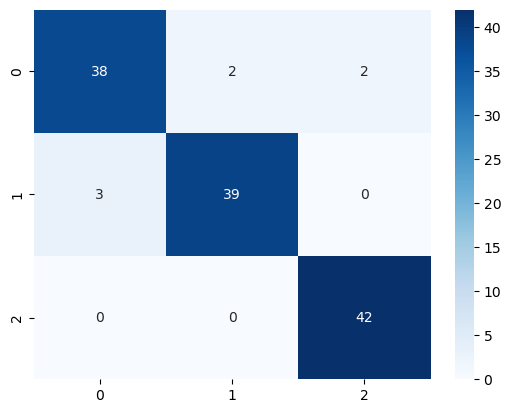

In [27]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_prediction), annot = True, cmap="Blues")
plt.savefig('confusion_test_size=70%withSVM.png')
plt.savefig('confusion_test_size=70%withSVM.svg') # save vector graphics

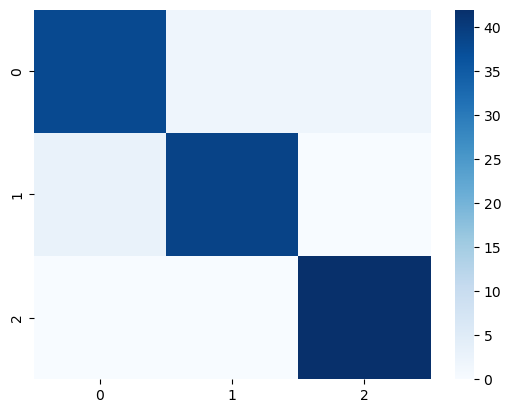

In [28]:
sns.heatmap(confusion_matrix(y_test,y_prediction), annot = False, cmap="Blues")
plt.savefig('confusion2_test_size=70%wihtSVM.png')
plt.savefig('confusion2_test_size=70%wihtSVM.svg') # save vector graphics